## Library & Setting

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import missingno as msno
from tqdm import tqdm_notebook as tq
pd.set_option('display.max_row',300)
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
path=os.getenv("HOME") + ('/repo/Lpoint-Hackathon/data/')
filename = ["01.Online.csv",  "02.Transaction.csv","04.demographic.csv", "03.Product classification.csv"]

## Data Loading

### 온라인 행동 정보(online)

In [3]:
online_dtype = {'clnt_id':'int64', 
                'sess_id':'int64',
                'hit_seq':'int64',
                'action_type':'int64',
                'biz_unit':'category', # 카테고리 형태
                'sess_dt':'object', # 분석할 때 날짜 형태로 변경
                'hit_tm':'object', # 분석할 때 시간 형태로 변경
                'hit_pss_tm':'int64',
                'trans_id':'float64', # NaN을 지원하는 float64로 설정
                'sech_kwd':'object',
                'tot_pag_view_ct':'float64', # NaN을 지원하는 float64로 설정
                'tot_sess_hr_v':'float64', # NaN을 지원하는 float64로 설정
                'trfc_src':'category', # 카테고리 형태
                'dvc_ctg_nm':'object' # 추후에 카테고리로 변경
               }

online = pd.read_csv(path + filename[0], dtype=online_dtype)
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196362 entries, 0 to 3196361
Data columns (total 14 columns):
 #   Column           Dtype   
---  ------           -----   
 0   clnt_id          int64   
 1   sess_id          int64   
 2   hit_seq          int64   
 3   action_type      int64   
 4   biz_unit         category
 5   sess_dt          object  
 6   hit_tm           object  
 7   hit_pss_tm       int64   
 8   trans_id         float64 
 9   sech_kwd         object  
 10  tot_pag_view_ct  float64 
 11  tot_sess_hr_v    float64 
 12  trfc_src         category
 13  dvc_ctg_nm       object  
dtypes: category(2), float64(3), int64(5), object(4)
memory usage: 298.7+ MB


### 거래 정보(trade)

In [4]:
trade_dtype = {'clnt_id':'int64',
               'trans_id':'float64',
               'biz_unit':'category',
               'pd_c':'object', # 'unknown' 이라는 형태 존재
               'de_dt':'object',
               'de_tm':'object',
               'buy_am':'int64',
               'buy_ct':'int64'}

trade = pd.read_csv(path + filename[1], dtype=trade_dtype)
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599961 entries, 0 to 599960
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   clnt_id    599961 non-null  int64   
 1   trans_id   599961 non-null  float64 
 2   trans_seq  599961 non-null  int64   
 3   biz_unit   599961 non-null  category
 4   pd_c       599961 non-null  object  
 5   de_dt      599961 non-null  object  
 6   de_tm      599961 non-null  object  
 7   buy_am     599961 non-null  int64   
 8   buy_ct     599961 non-null  int64   
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 37.2+ MB


### 고객 정보(customer)

In [5]:
customer_dtype = {'clnt_id':'int64',
                  'clnt_gender':'object',
                  'clnt_age':'object'}
customer = pd.read_csv(path + filename[2], dtype=customer_dtype)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72399 entries, 0 to 72398
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clnt_id      72399 non-null  int64 
 1   clnt_gender  72399 non-null  object
 2   clnt_age     72399 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### 상품분류 정보(item)

In [6]:
item_dtype = {'pd_c':'float64', # 거래 정보 데이터와 일치하도록 설정
              'clac_nm1':'category',
              'clac_nm2':'category',
              'clac_nm3':'category'}
item = pd.read_csv(path + filename[3], dtype=item_dtype)
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pd_c      1667 non-null   float64 
 1   clac_nm1  1667 non-null   category
 2   clac_nm2  1667 non-null   category
 3   clac_nm3  1665 non-null   category
dtypes: category(3), float64(1)
memory usage: 127.3 KB


## Data Cleansing

### 온라인 행동 정보(online)

#### 결측치 처리

<AxesSubplot:>

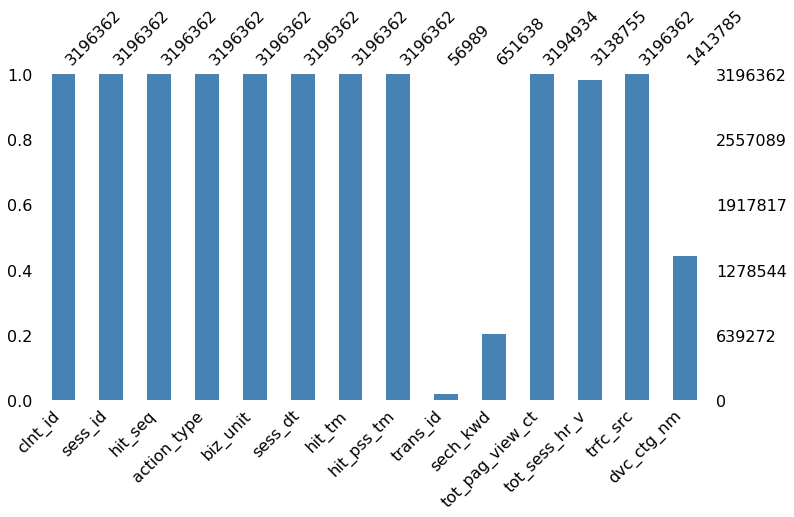

In [7]:
msno.bar(online, figsize=(12,6), color='steelblue')

- trans_id: trains_id에 NaN이 가장 많습니다. 실제로 행해진 거래에서만 적용되기 때문입니다. 
- sech_kwd: 키워드를 통해서 들어오지 않은 경우도 많기 때문에 결측치가 많습니다.
- tot_pag_view_ct: 총페이지조회건수가 NaN이라면 0이 맞을까?? 
- tot_sess_hr_v: 총세션시간값이 NaN이라면 0이 맞을까??
- dvc_ctg_nm: NaN은 활동이 없는 기기 유형이지만, 기록이 되어야 하므로 trfc_src의 unknown으로 대체합니다.

<AxesSubplot:xlabel='biz_unit', ylabel='count'>

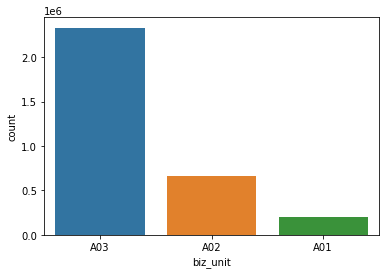

In [51]:
sns.countplot(online['biz_unit'])

### trans_id 결측치 확인

<AxesSubplot:xlabel='action_type', ylabel='count'>

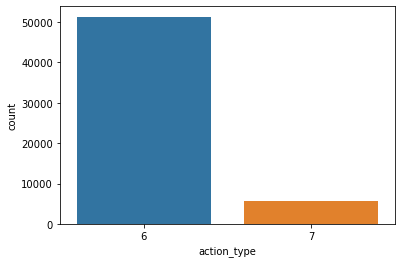

In [29]:
on_trans = online[online['trans_id'].notnull()]
sns.countplot(on_trans['action_type'])

그래프로 시각화 한 결과 trans_id는 온라인 행동정도(action_type)의 6번과 7번 정보를 가지고 있습니다.  
그렇다면 trans_id는 6과 7일때 항상 거래정보(trans_id)를 가지고 있을까요?

In [39]:
print('거래정보 상 구매한 총 회원 수: ', sum(on_trans['action_type']==6))
print('거래정보 상 환불한 총 회원 수: ', sum(on_trans['action_type']==7))

거래정보 상 구매한 총 회원 수:  51313
거래정보 상 환불한 총 회원 수:  5676


In [40]:
print('실제로 구매한 총 회원 수: ', sum(online['action_type'] == 6))
print('실제로 환불한 총 회원 수: ', sum(online['action_type'] == 7))

실제로 구매한 총 회원 수:  56249
실제로 환불한 총 회원 수:  5676


환불한 총 수는 같지만, 구매한 총 수에서는 4936 명이 비어있습니다.  
trans_id를 채우면 좋겠지만, 잠시 보류하겠습니다. 

### 결측치 채우기

In [112]:
online.loc[online['tot_pag_view_ct'].isnull(),'tot_pag_view_ct'] = 0
online.loc[online['tot_sess_hr_v'].isnull(),'tot_sess_hr_v'] = 0
online.loc[online['dvc_ctg_nm'].isnull(),'dvc_ctg_nm'] = 'unknown'
online['tot_pag_view_ct'] = online['tot_pag_view_ct'].astype(np.int64)
online['tot_sess_hr_v'] = online['tot_sess_hr_v'].astype(np.int64)
online['dvc_ctg_nm'] = online['dvc_ctg_nm'].astype('category')

<AxesSubplot:>

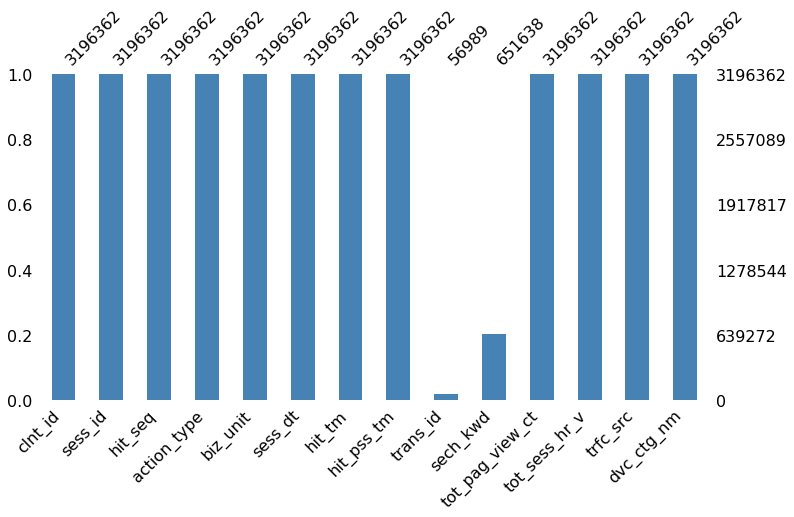

In [113]:
msno.bar(online, figsize=(12,6), color='steelblue')

trans_id와 sech_kwd를 제외하고 나머지 feature의 결측치가 채워졌습니다. 

### 중복값 처리

In [117]:
part = online[['clnt_id','sess_id','tot_sess_hr_v']]
blacklist = part.drop_duplicates().groupby(['clnt_id','sess_id']).size().to_frame('count').reset_index()
bl = blacklist[blacklist['count']>=2]
bl.head(5)

,clnt_id,sess_id,count
2,2,1,2
80,17,3,2
99,23,4,2
184,40,6,2
309,49,34,2


본래 세션 하나당 총 페이지 뷰 수와 총 세션 시간은 동일해야 합니다.  그러나 중복되는 세션들이 있습니다. 어떠한 이유인지 한 가지를 예시로 살펴봅니다.

In [118]:
online[(online['clnt_id']==2)&(online['sess_id']==1)].sort_values('hit_seq').tail(5)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
1427756,2,1,39,5,A03,20190728,23:48,827645,NaN,NaN,55,872,DIRECT,unknown
1427653,2,1,40,5,A03,20190728,23:48,862074,NaN,NaN,55,872,DIRECT,unknown
1427645,2,1,41,5,A03,20190728,23:48,865245,NaN,NaN,55,872,DIRECT,unknown
1427707,2,1,42,5,A03,20190728,23:49,867734,NaN,NaN,55,872,DIRECT,unknown
1427606,2,1,43,5,A03,20190729,00:01,6880,NaN,NaN,6,39,DIRECT,unknown


- 문제는  00:00에 있습니다. 자정이 넘어가면서, 총 페이지 뷰 수와 총 세션 시간이 다르게 기록됩니다.  
그렇다면 이 둘을 더해야 정확한 자료가 될 것입니다.  
저희는 이러한 중복값을 올바르게 된 총 페이지 뷰 수와, 총 세션 시간을 따로 저장하여 전처리했습니다.

In [119]:
cl,ss,pv,hr = [[],[],[],[]]
for i in tq(range(len(bl))):
    unit = bl.iloc[i]
    data = online[(online['clnt_id']==unit['clnt_id'])&(online['sess_id']==unit['sess_id'])]
    cl.append(unit['clnt_id'])
    ss.append(unit['sess_id'])
    pv.append(data['tot_pag_view_ct'].unique().sum())
    hr.append(data['tot_sess_hr_v'].unique().sum())
right = pd.DataFrame({'clnt_id':cl,
                      'sess_id':ss,
                      'tot_pag_view_ct':pv,
                      'tot_sess_hr_v':hr})

먼저, 제대로 기록되어야 하는 값을 clnt_id와 sess_id 에 맞게 저장합니다.

In [120]:
for i in tq(range(len(right))):
    unit = right.iloc[i]
    online.loc[(online['clnt_id']==unit['clnt_id'])&(online['sess_id']==unit['sess_id']),'tot_pag_view_ct'] = unit['tot_pag_view_ct']
    online.loc[(online['clnt_id']==unit['clnt_id'])&(online['sess_id']==unit['sess_id']),'tot_sess_hr_v'] = unit['tot_sess_hr_v']    

In [124]:
online[(online['clnt_id']==2)&(online['sess_id']==1)].sort_values('hit_seq').tail(5)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
1427756,2,1,39,5,A03,20190728,23:48,827645,NaN,NaN,61,911,DIRECT,unknown
1427653,2,1,40,5,A03,20190728,23:48,862074,NaN,NaN,61,911,DIRECT,unknown
1427645,2,1,41,5,A03,20190728,23:48,865245,NaN,NaN,61,911,DIRECT,unknown
1427707,2,1,42,5,A03,20190728,23:49,867734,NaN,NaN,61,911,DIRECT,unknown
1427606,2,1,43,5,A03,20190729,00:01,6880,NaN,NaN,61,911,DIRECT,unknown


자정이 넘어가도 같은 세션으로 처리되었습니다. 

### 거래 정보(trade)

In [125]:
trade['pd_c'].unique()

array(['unknown', '0565', '0572', ..., '0689', '1078', '0305'],
      dtype=object)

In [126]:
trade.loc[trade['pd_c']=='unknown','pd_c'] = np.NaN
trade['pd_c']= trade['pd_c'].astype(np.float64)

### 고객 정보(customer)

In [128]:
print(customer['clnt_gender'].unique())
print(customer['clnt_age'].unique())

[NaN, 'F', 'M']
Categories (2, object): ['F', 'M']
[nan 30. 40. 20. 50. 60. 10.]


'unknown'은 비식별 인원을 의미하는데, 추후 편리함을 위해 np.NaN으로 변경합니다.  
그리고 성별은 카테고리 타입, 연령은 NaN을 지원하는 float 타입으로 변경합니다.

In [129]:
customer.loc[customer['clnt_gender']=='unknown','clnt_gender'] = np.NaN
customer['clnt_gender'] = customer['clnt_gender'].astype('category')

customer.loc[customer['clnt_age']=='unknown','clnt_age'] = np.NaN
customer['clnt_age'] = customer['clnt_age'].astype(float)

### Data Saving

In [131]:
online = online.sort_values(['clnt_id','sess_id','hit_seq'])
online.to_csv('../src/DATA/온라인 행동 정보(CKS).csv', index=False)

In [132]:
trade = trade.sort_values(['clnt_id','trans_id','trans_seq'])
trade.to_csv('../src/DATA/거래 정보(CKS).csv',index=False)

In [133]:
customer = customer.sort_values('clnt_id')
customer.to_csv('../src/DATA/고객 정보(CKS).csv',index=False)

In [134]:
item = item.sort_values('pd_c')
item.to_csv('../src/DATA/상품분류 정보(CKS).csv',index=False)